<a href="https://colab.research.google.com/github/MarielaNina/NeuralNetworksClass/blob/main/Projeto5_Mariela_Nina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO 5: IMPLEMENTAÇÃO E AVALIAÇÃO DE REDES CNN

**Autor:** Mariela Nina

**Disciplina:** Redes Neurais

**Professor:** Marcos G. Quiles

**Data:** Novembro 2025

# 1) Importação de Bibliotecas Necessárias

In [1]:

import numpy as np  # Para operações matemáticas e arrays
import matplotlib.pyplot as plt  # Para criar gráficos e visualizações
import seaborn as sns  # Para gráficos mais bonitos (matriz de confusão)

# Bibliotecas do scikit-learn para métricas de avaliação
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# TensorFlow e Keras para construir as redes neurais
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist, mnist  # Ambos datasets
from tensorflow.keras.utils import to_categorical  # Para one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Para otimizar o treinamento

# Verifico a versão do TensorFlow e se tenho GPU disponível
print(f"Versão do TensorFlow: {tf.__version__}")
print(f"GPU disponível: {tf.config.list_physical_devices('GPU')}")


Versão do TensorFlow: 2.19.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 2) Carregamento do Dataset Fashion MNIST

In [2]:
# O dataset Fashion MNIST é carregado, contendo 70.000 imagens em escala de cinza de 28x28 pixels,
# distribuídas em 10 categorias de roupas. Os dados são divididos em conjuntos de treino e teste.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Nomes das 10 classes presentes no Fashion MNIST, cada uma representando um tipo de vestuário.
class_names = ['Camiseta', 'Calça', 'Pulôver', 'Vestido', 'Casaco',
               'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

print(f"\nDimensões dos dados de treino: {X_train.shape}")
print(f"Dimensões dos dados de teste: {X_test.shape}")
print(f"Número de classes: {len(class_names)}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Dimensões dos dados de treino: (60000, 28, 28)
Dimensões dos dados de teste: (10000, 28, 28)
Número de classes: 10


# 3) Exploração Inicial dos Dados

In [3]:
# Algumas características essenciais do dataset são analisadas antes do processamento.
# O intervalo de valores dos pixels é examinado.
print(f"Valor mínimo dos pixels: {X_train.min()}")
print(f"Valor máximo dos pixels: {X_train.max()}")
print(f"Tipo de dados: {X_train.dtype}")
print(f"Shape de uma imagem: {X_train[0].shape}")

# A distribuição das classes no conjunto de treino é apresentada.
print("\nDistribuição das classes no conjunto de treino:")
unique, counts = np.unique(y_train, return_counts=True)
for i, count in zip(unique, counts):
    print(f"  Classe {i} ({class_names[i]}): {count} imagens")

Valor mínimo dos pixels: 0
Valor máximo dos pixels: 255
Tipo de dados: uint8
Shape de uma imagem: (28, 28)

Distribuição das classes no conjunto de treino:
  Classe 0 (Camiseta): 6000 imagens
  Classe 1 (Calça): 6000 imagens
  Classe 2 (Pulôver): 6000 imagens
  Classe 3 (Vestido): 6000 imagens
  Classe 4 (Casaco): 6000 imagens
  Classe 5 (Sandália): 6000 imagens
  Classe 6 (Camisa): 6000 imagens
  Classe 7 (Tênis): 6000 imagens
  Classe 8 (Bolsa): 6000 imagens
  Classe 9 (Bota): 6000 imagens


#4) Visualização de Amostras do Dataset

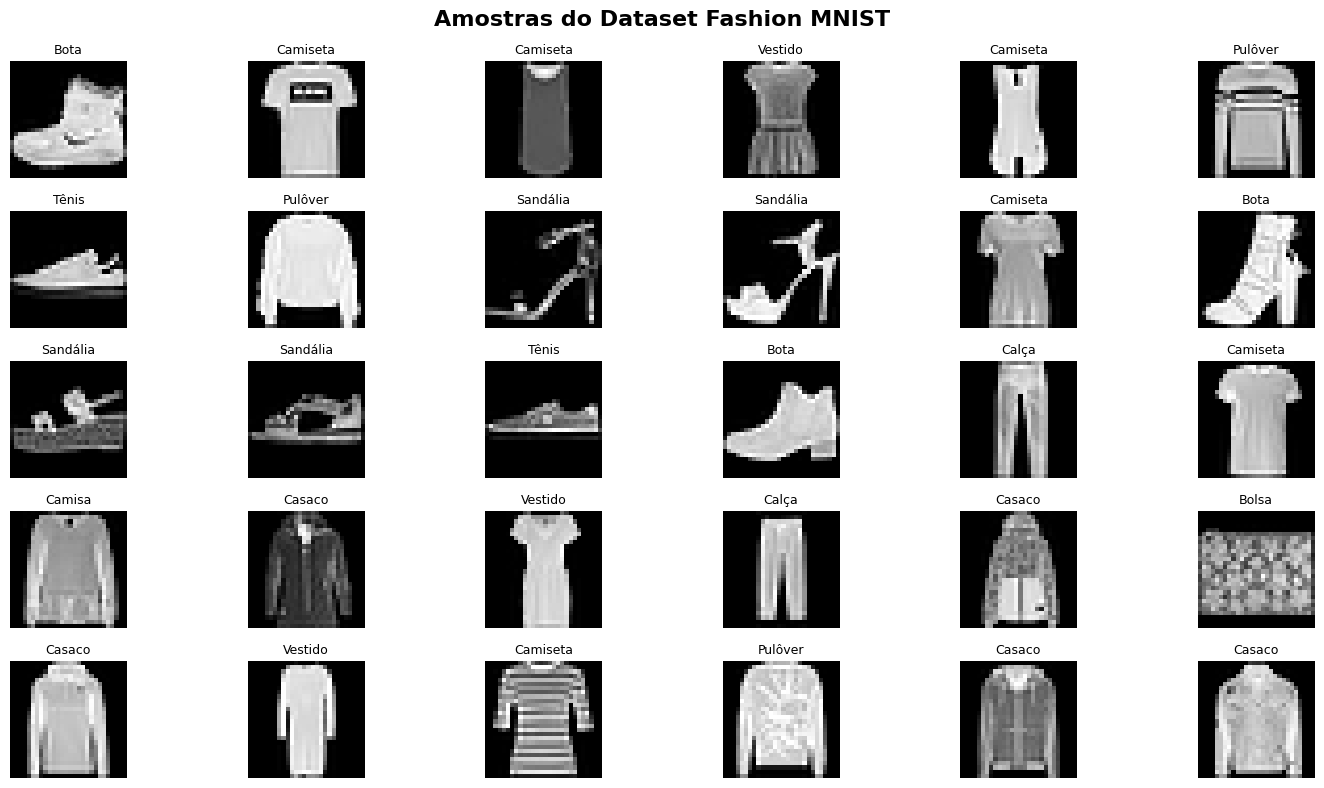

In [4]:
# Algumas imagens do conjunto de treino são exibidas para facilitar a compreensão visual dos dados.
plt.figure(figsize=(15, 8))
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"{class_names[y_train[i]]}", fontsize=9)
    plt.axis('off')
plt.suptitle('Amostras do Dataset Fashion MNIST', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

 # 5) Pré-processamento dos Dados

In [5]:
# Os dados são preparados para o treinamento das redes neurais.
# Os valores dos pixels são normalizados para o intervalo [0, 1], facilitando a convergência da rede neural.
print("Normalizando os pixels para o intervalo [0, 1]...")
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

print(f"Novo intervalo de valores: [{X_train_norm.min()}, {X_train_norm.max()}]")

# Uma dimensão de canal é adicionada para compatibilidade com redes convolucionais (CNNs),
# já que Fashion MNIST é um conjunto de imagens em escala de cinza.
X_train_cnn = X_train_norm.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_norm.reshape(-1, 28, 28, 1)

print(f"\nShape após adicionar dimensão de canal:")
print(f"  Treino: {X_train_cnn.shape}")
print(f"  Teste: {X_test_cnn.shape}")

# Os rótulos são convertidos para o formato one-hot encoding.
# Por exemplo: a classe 3 se torna [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
print("\nConvertendo labels para one-hot encoding...")
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Shape dos labels após one-hot: {y_train_cat.shape}")
print(f"Exemplo de label original: {y_train[0]} ({class_names[y_train[0]]})")
print(f"Exemplo de label após one-hot: {y_train_cat[0]}")

Normalizando os pixels para o intervalo [0, 1]...
Novo intervalo de valores: [0.0, 1.0]

Shape após adicionar dimensão de canal:
  Treino: (60000, 28, 28, 1)
  Teste: (10000, 28, 28, 1)

Convertendo labels para one-hot encoding...
Shape dos labels após one-hot: (60000, 10)
Exemplo de label original: 9 (Bota)
Exemplo de label após one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


 # 6) Definição das TOPOLOGIAS

**6.1) Definição da TOPOLOGIA 1 - CNN Simples**

    TOPOLOGIA 1: CNN SIMPLES

    Arquitetura básica com poucos parâmetros:
    - 2 blocos convolucionais com 32 e 64 filtros
    - MaxPooling para reduzir dimensionalidade
    - 1 camada densa de 64 neurônios
    - Camada de saída com 10 neurônios (uma para cada classe)

    Objetivo: Servir como baseline para comparação

In [6]:
# Uma arquitetura simples baseada em CNN é definida para servir como baseline.
def criar_cnn_simples(input_shape=(28, 28, 1)):

    model = models.Sequential([
        # Primeiro bloco convolucional
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Segundo bloco convolucional
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Camadas densas
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ], name='CNN_Simples')

    return model

# A arquitetura da CNN simples é criada e resumida para visualização da estrutura do modelo.
modelo_1 = criar_cnn_simples()
print("\nArquitetura da CNN Simples:")
modelo_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Arquitetura da CNN Simples:


Model: "CNN_Simples"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

**6.2)  Definição da TOPOLOGIA 2 - CNN Profunda**

    TOPOLOGIA 2: CNN PROFUNDA

    Arquitetura com mais camadas:
    - 4 blocos convolucionais (32, 32, 64, 64 filtros)
    - Dropout para evitar overfitting
    - Camada densa maior (512 neurônios)

    Objetivo: Extrair características mais complexas e hierárquicas

In [7]:
# Uma segunda arquitetura é definida com maior profundidade para capturar características mais complexas no conjunto de dados.
def criar_cnn_profunda(input_shape=(28, 28, 1)):

    model = models.Sequential([
        # Primeiro bloco convolucional: duas camadas convolucionais sucessivas seguidas por pooling e dropout.
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Segundo bloco convolucional: repete o padrão com mais filtros.
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Bloco denso e saída: flatten, camada totalmente conectada, dropout e camada de saída softmax.
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ], name='CNN_Profunda')

    return model

# A arquitetura da CNN profunda é instanciada e seu resumo é exibido para visualização da estrutura.
modelo_2 = criar_cnn_profunda()
print("\nArquitetura da CNN Profunda:")
modelo_2.summary()


Arquitetura da CNN Profunda:


Model: "CNN_Profunda"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,266 (6.39 MB)

 Trainable params: 1,676,266 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

**6.3) Definição da TOPOLOGIA 3 - CNN Ancha**

    TOPOLOGIA 3: CNN ANCHA

    Arquitetura com mais filtros:
    - 128 e 256 filtros (ao invés de 32 e 64)
    - Extrai mais características em paralelo
    - Mais neurônios na camada densa (256)

    Objetivo: Capturar mais variações de padrões nas imagens


In [8]:
# Uma terceira arquitetura é projetada com maior largura, ou seja, mais filtros em cada camada convolucional.
def criar_cnn_ancha(input_shape=(28, 28, 1)):

    model = models.Sequential([
        # Primeiro bloco convolucional com grande quantidade de filtros.
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Segundo bloco convolucional com ainda mais filtros para maior capacidade de extração de características.
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Camada de flatten seguida por camada densa e saída softmax.
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ], name='CNN_Ancha')

    return model

# A arquitetura da CNN larga é instanciada e seu resumo é exibido para análise da estrutura.
modelo_3 = criar_cnn_ancha()
print("\nArquitetura da CNN Ancha:")
modelo_3.summary()


Arquitetura da CNN Ancha:


Model: "CNN_Ancha"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,510,538 (13.39 MB)

 Trainable params: 3,510,538 (13.39 MB)

 Non-trainable params: 0 (0.00 B)

**6.4)  Definição da TOPOLOGIA 4 - CNN com Batch Normalization**

    TOPOLOGIA 4: CNN COM BATCH NORMALIZATION

    Características:
    - Batch Normalization após cada convolução
    - Normaliza as ativações para estabilizar o treinamento
    - Permite usar learning rates maiores
    - Reduz dependência de inicialização dos pesos

    Objetivo: Melhorar convergência e generalização

In [9]:
# Uma quarta arquitetura é definida, incorporando camadas de Batch Normalization para estabilizar e acelerar o treinamento do modelo.
def criar_cnn_batchnorm(input_shape=(28, 28, 1)):

    model = models.Sequential([
        # Primeiro bloco convolucional: camada convolucional, normalização em lote e pooling.
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Segundo bloco convolucional: repete-se o padrão com mais filtros.
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Terceiro bloco convolucional para extração aprofundada de características.
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Camadas finais: flatten, camada densa, normalização, dropout e saída softmax.
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ], name='CNN_BatchNorm')

    return model

# A arquitetura com Batch Normalization é instanciada e exibida para análise de sua composição.
modelo_4 = criar_cnn_batchnorm()
print("\nArquitetura da CNN com Batch Normalization:")
modelo_4.summary()


Arquitetura da CNN com Batch Normalization:


Model: "CNN_BatchNorm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,954 (949.04 KB)

 Trainable params: 242,250 (946.29 KB)

 Non-trainable params: 704 (2.75 KB)

**6.5)  Definição da TOPOLOGIA 5 - CNN com Filtros Grandes**

    TOPOLOGIA 5: CNN COM FILTROS GRANDES

    Características:
    - Filtros 5x5 nas primeiras camadas (ao invés de 3x3)
    - Captura padrões maiores de uma vez
    - Combina com filtros 3x3 nas últimas camadas

    Objetivo: Testar se filtros maiores melhoram a detecção de padrões

In [10]:
# Uma quinta arquitetura é projetada utilizando filtros convolucionais maiores (5x5) para capturar padrões espaciais mais amplos nas imagens.
def criar_cnn_filtros_grandes(input_shape=(28, 28, 1)):

    model = models.Sequential([
        # Primeiro bloco convolucional empregando filtros 5x5 para extração inicial de características.
        layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Segundo bloco convolucional com filtros 5x5 para reforço da extração de padrões de maior escala.
        layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Terceiro bloco utiliza filtros 3x3 para detalhamento das características extraídas.
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Bloco final: flatten, camada densa para classificação e camada de saída softmax.
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ], name='CNN_FiltrosGrandes')

    return model

# A arquitetura com filtros grandes é instanciada e o resumo do modelo é exibido.
modelo_5 = criar_cnn_filtros_grandes()
print("\nArquitetura da CNN com Filtros Grandes:")
modelo_5.summary()


Arquitetura da CNN com Filtros Grandes:


Model: "CNN_FiltrosGrandes"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,690 (1.62 MB)

 Trainable params: 423,690 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

**6.6)  Definição da TOPOLOGIA 6 - CNN Estilo VGG**

    TOPOLOGIA 6: CNN ESTILO VGG

    Características:
    - Inspirada na arquitetura VGG
    - Múltiplas convoluções 3x3 consecutivas
    - Profundidade crescente: 64 -> 128 -> 256 filtros
    - Dropout progressivo (0.2 -> 0.3 -> 0.4)

    Objetivo: Usar uma arquitetura comprovadamente eficaz

In [11]:
# Uma sexta arquitetura é definida baseada no estilo VGG, utilizando blocos repetidos de convoluções seguidas de pooling.
def criar_cnn_vgg_style(input_shape=(28, 28, 1)):

    model = models.Sequential([
        # Primeiro bloco VGG: duas camadas convolucionais 3x3 seguidas por pooling e dropout.
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        # Segundo bloco VGG: padrão repetido com mais filtros e dropout aumentado.
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Terceiro bloco VGG: ainda mais filtros e dropout.
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Camadas do classificador: flatten, densa e saída softmax.
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ], name='CNN_VGG_Style')

    return model

# A arquitetura inspirada na VGG é instanciada e o resumo do modelo é exibido para análise.
modelo_6 = criar_cnn_vgg_style()
print("\nArquitetura da CNN Estilo VGG:")
modelo_6.summary()


Arquitetura da CNN Estilo VGG:


Model: "CNN_VGG_Style"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,329,546 (8.89 MB)

 Trainable params: 2,329,546 (8.89 MB)

 Non-trainable params: 0 (0.00 B)

# 7) Preparação para Treinamento

In [12]:
# Os callbacks e parâmetros utilizados no treinamento de todos os modelos são definidos a seguir.

# Early Stopping: interrompe o treinamento caso a métrica de validação não apresente melhoria após certo número de épocas.
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitora o valor da loss de validação.
    patience=10,             # Permite até 10 épocas sem melhora.
    restore_best_weights=True,  # Restaura os melhores pesos encontrados durante o treinamento.
    verbose=1
)

# Reduce Learning Rate: ajusta a taxa de aprendizado, diminuindo-a quando a performance estagna.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',      # Monitora o valor da loss de validação.
    factor=0.5,              # Reduz a taxa de aprendizado pela metade.
    patience=5,              # Permite até 5 épocas sem melhora na loss.
    min_lr=1e-6,             # Estabelece taxa de aprendizado mínima.
    verbose=1
)

print("✓ Callbacks configurados:")
print("  - Early Stopping (patience=10)")
print("  - Reduce Learning Rate on Plateau (patience=5, factor=0.5)")

# Dicionário armazenando todas as funções para criação dos diferentes modelos de CNN definidos anteriormente.
modelos_cnn = {
    'CNN_Simples': criar_cnn_simples,
    'CNN_Profunda': criar_cnn_profunda,
    'CNN_Ancha': criar_cnn_ancha,
    'CNN_BatchNorm': criar_cnn_batchnorm,
    'CNN_FiltrosGrandes': criar_cnn_filtros_grandes,
    'CNN_VGG_Style': criar_cnn_vgg_style
}

✓ Callbacks configurados:
  - Early Stopping (patience=10)
  - Reduce Learning Rate on Plateau (patience=5, factor=0.5)


# 8) Treinamento de Todos os Modelos CNN

In [13]:
# O treinamento é realizado para cada uma das seis topologias de modelo, com armazenamento dos resultados obtidos.

# Estrutura para guardar os resultados de cada modelo testado.
resultados = {}

# Laço para treinar todos os modelos definidos no dicionário "modelos_cnn".
for idx, (nome, criar_modelo) in enumerate(modelos_cnn.items(), 1):
    print(f"\n{'='*80}")
    print(f"TREINANDO MODELO {idx}/6: {nome}")
    print(f"{'='*80}")

    # Instanciação do modelo correspondente.
    model = criar_modelo()

    # Compilação do modelo utilizando Adam como otimizador e categorical crossentropy como função de perda.
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    print(f"   Parâmetros totais: {model.count_params():,}")

    # Processo de treinamento do modelo com divisão dos dados em treino e validação, e utilização de callbacks para controle dinâmico.
    history = model.fit(
        X_train_cnn, y_train_cat,
        batch_size=128,           # Lotes de 128 imagens.
        epochs=50,                # Treinamento máximo de 50 épocas.
        validation_split=0.2,     # 20% dos dados para validação.
        callbacks=[early_stopping, reduce_lr],  # Utilização dos callbacks definidos.
        verbose=1
    )

    # Avaliação de desempenho do modelo treinado sobre o conjunto de teste.
    test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cat, verbose=0)

    # Realização de predições para análises posteriores.
    y_pred = model.predict(X_test_cnn, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Registro dos principais resultados e objetos relacionados ao modelo treinado.
    resultados[nome] = {
        'model': model,
        'history': history,
        'test_acc': test_acc,
        'test_loss': test_loss,
        'y_pred': y_pred_classes,
        'num_params': model.count_params()
    }

    print(f"    Acurácia no Teste: {test_acc:.4f} ({test_acc*100:.2f}%)")
    print(f"    Loss no Teste: {test_loss:.4f}")
    print(f"    Total de Parâmetros: {model.count_params():,}")


TREINANDO MODELO 1/6: CNN_Simples
   Parâmetros totais: 121,930
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6911 - loss: 0.9154 - val_accuracy: 0.8518 - val_loss: 0.4195 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8617 - loss: 0.3897 - val_accuracy: 0.8702 - val_loss: 0.3609 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8771 - loss: 0.3439 - val_accuracy: 0.8805 - val_loss: 0.3406 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8899 - loss: 0.3059 - val_accuracy: 0.8886 - val_loss: 0.3122 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8946 - loss: 0.2888 - val_accuracy: 0.8916 - val_loss: 0.2978 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9040 - loss: 0.2647 - val_accuracy: 0.8920 - val_loss: 0.3001 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━

# 9) Comparação dos Resultados

In [16]:
# A comparação dos resultados obtidos por todas as topologias de modelos treinados é realizada a seguir.

# Uma tabela é exibida para facilitar a visualização dos principais resultados de cada arquitetura.
print(f"\n{'Modelo':<25} {'Acurácia':<12} {'Loss':<12} {'Parâmetros':<15}")
print("-"*80)

# Os modelos são ordenados por acurácia de teste, do melhor para o pior desempenho.
resultados_ordenados = sorted(resultados.items(),
                              key=lambda x: x[1]['test_acc'],
                              reverse=True)

# Impressão dos resultados de cada arquitetura ordenada por performance.
for posicao, (nome, res) in enumerate(resultados_ordenados, 1):
    print(f"{posicao}. {nome:<23} {res['test_acc']:<12.4f} {res['test_loss']:<12.4f} {res['num_params']:>14,}")

# Os dois melhores modelos são destacados de acordo com a acurácia obtida.
top_2_nomes = [nome for nome, _ in resultados_ordenados[:2]]
print(f"\n Top 2 Modelos:")
print(f"   1º lugar: {top_2_nomes[0]} - Acurácia: {resultados[top_2_nomes[0]]['test_acc']:.4f}")
print(f"   2º lugar: {top_2_nomes[1]} - Acurácia: {resultados[top_2_nomes[1]]['test_acc']:.4f}")


Modelo                    Acurácia     Loss         Parâmetros     
--------------------------------------------------------------------------------
1. CNN_VGG_Style           0.9291       0.2116            2,329,546
2. CNN_Profunda            0.9279       0.2049            1,676,266
3. CNN_Ancha               0.9215       0.2273            3,510,538
4. CNN_FiltrosGrandes      0.9155       0.2361              423,690
5. CNN_BatchNorm           0.9134       0.2447              242,954
6. CNN_Simples             0.9045       0.2719              121,930

 Top 2 Modelos:
   1º lugar: CNN_VGG_Style - Acurácia: 0.9291
   2º lugar: CNN_Profunda - Acurácia: 0.9279


**9.1) Visualização Comparativa - Gráficos de Barras**

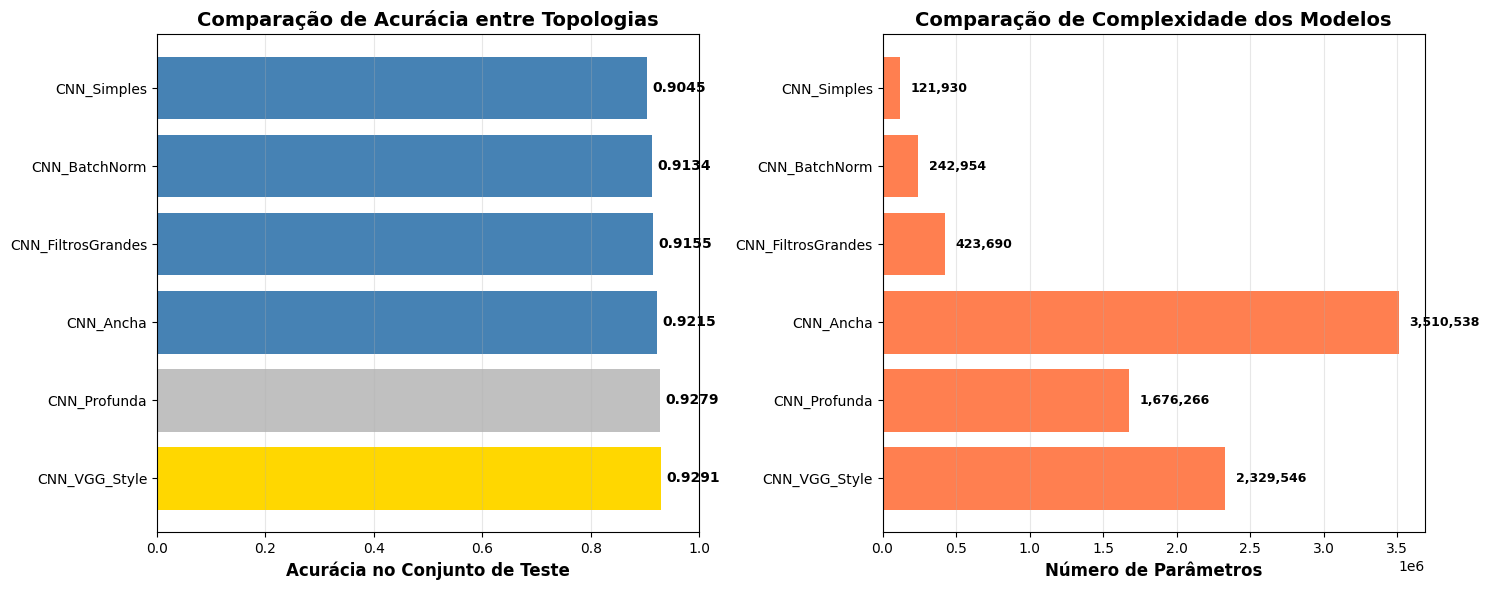

In [17]:
# Gráficos são gerados para facilitar a comparação visual entre as topologias avaliadas.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Preparação dos dados necessários para os gráficos de comparação.
nomes = [n for n, _ in resultados_ordenados]
acuracias = [r['test_acc'] for _, r in resultados_ordenados]
params = [r['num_params'] for _, r in resultados_ordenados]

# O primeiro gráfico apresenta a comparação das acurácias de teste entre os modelos.
cores = ['gold' if i == 0 else 'silver' if i == 1 else 'steelblue'
         for i in range(len(nomes))]

axes[0].barh(nomes, acuracias, color=cores)
axes[0].set_xlabel('Acurácia no Conjunto de Teste', fontsize=12, fontweight='bold')
axes[0].set_title('Comparação de Acurácia entre Topologias', fontsize=14, fontweight='bold')
axes[0].set_xlim([0, 1])
axes[0].grid(axis='x', alpha=0.3)

# Inserção dos valores de acurácia diretamente sobre as barras horizontais.
for i, v in enumerate(acuracias):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# O segundo gráfico apresenta o número total de parâmetros de cada arquitetura.
axes[1].barh(nomes, params, color='coral')
axes[1].set_xlabel('Número de Parâmetros', fontsize=12, fontweight='bold')
axes[1].set_title('Comparação de Complexidade dos Modelos', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Inserção dos valores numéricos de parâmetros ao lado das barras correspondentes.
for i, v in enumerate(params):
    axes[1].text(v + max(params)*0.02, i, f'{v:,}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

**9.2) Curvas de Aprendizado de Todos os Modelos**

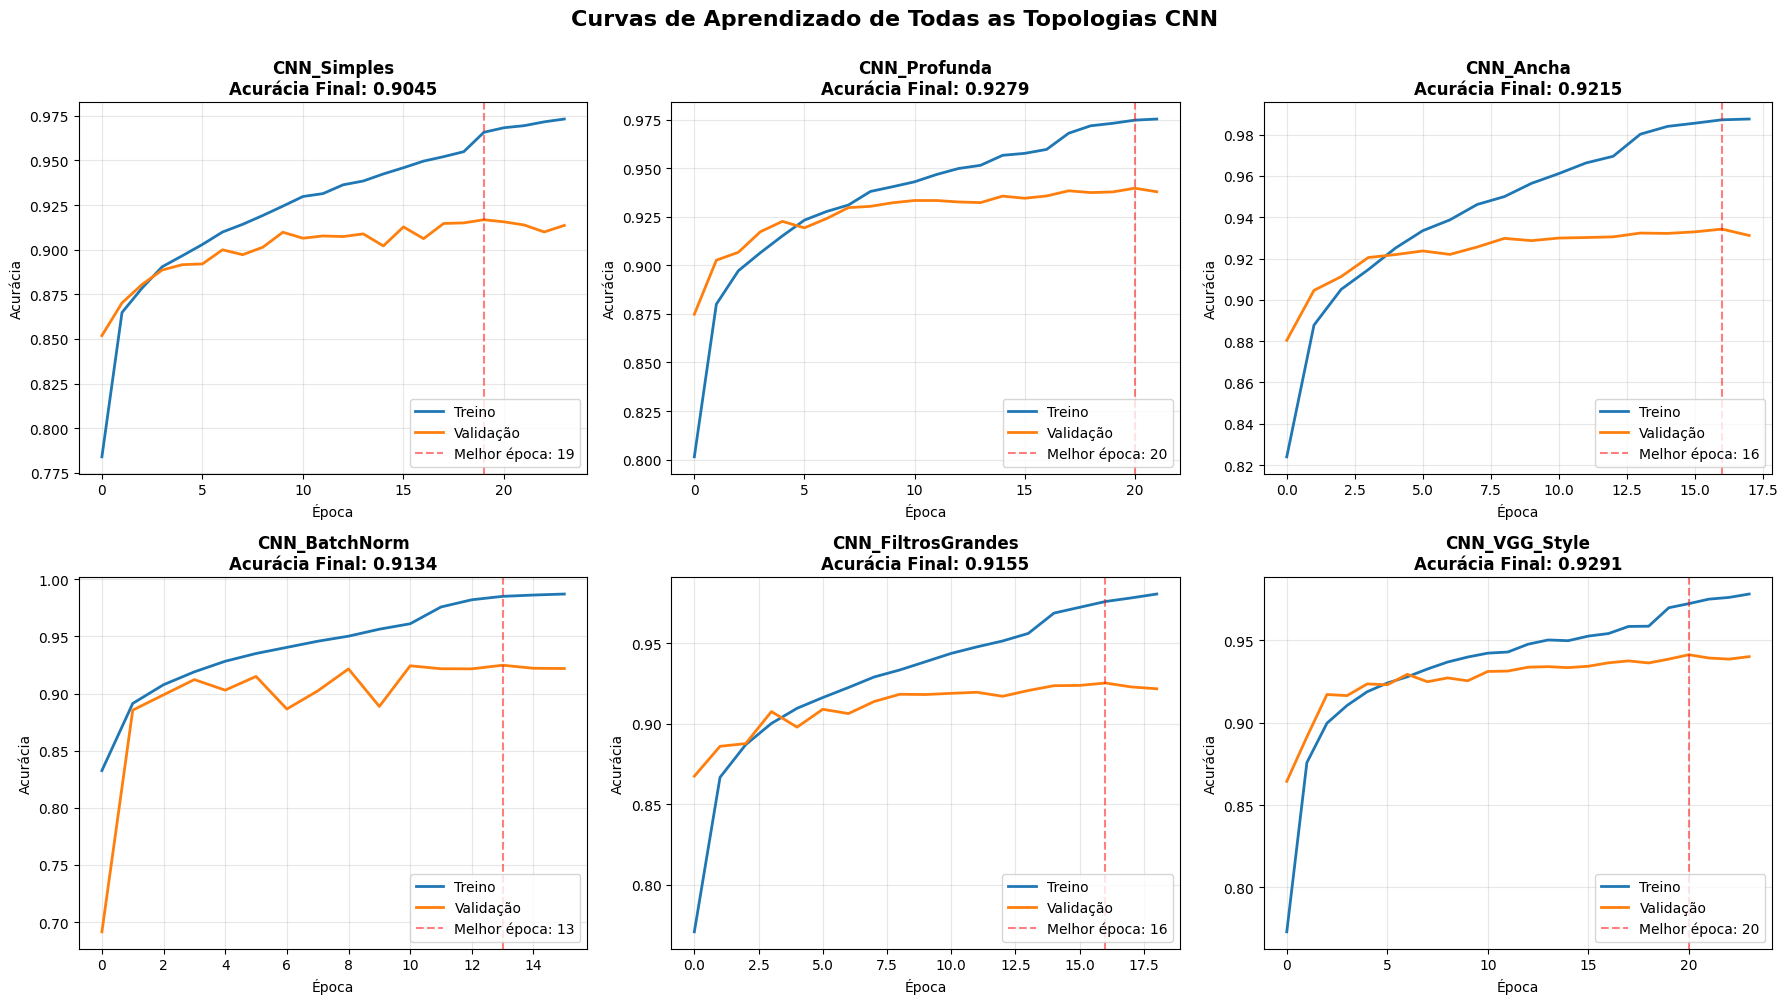

In [18]:
# As curvas de aprendizado de acurácia para cada modelo treinado são visualizadas ao longo das épocas.

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (nome, res) in enumerate(resultados.items()):
    hist = res['history']

    # As curvas de acurácia de treino e validação são plotadas para análise de desempenho por época.
    axes[idx].plot(hist.history['accuracy'], label='Treino', linewidth=2)
    axes[idx].plot(hist.history['val_accuracy'], label='Validação', linewidth=2)

    # Uma linha vertical indica a época de melhor desempenho em validação.
    melhor_epoch = np.argmax(hist.history['val_accuracy'])
    axes[idx].axvline(melhor_epoch, color='red', linestyle='--',
                     alpha=0.5, label=f'Melhor época: {melhor_epoch}')

    axes[idx].set_title(f"{nome}\nAcurácia Final: {res['test_acc']:.4f}",
                       fontweight='bold')
    axes[idx].set_xlabel('Época')
    axes[idx].set_ylabel('Acurácia')
    axes[idx].legend(loc='lower right')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Curvas de Aprendizado de Todas as Topologias CNN',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

**9.3) Matriz de Confusão do Melhor Modelo (1º lugar)**

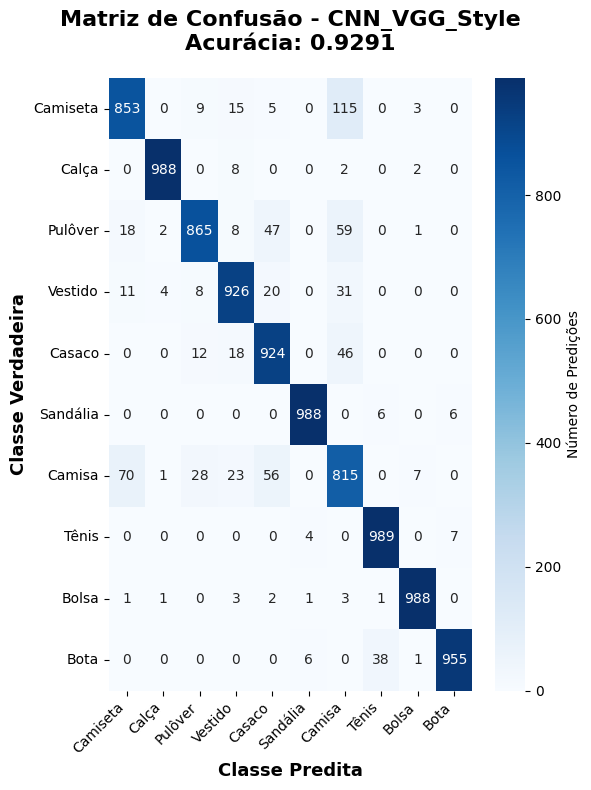


 Relatório de Classificação Detalhado - CNN_VGG_Style:
              precision    recall  f1-score   support

    Camiseta     0.8951    0.8530    0.8735      1000
       Calça     0.9920    0.9880    0.9900      1000
     Pulôver     0.9382    0.8650    0.9001      1000
     Vestido     0.9251    0.9260    0.9255      1000
      Casaco     0.8767    0.9240    0.8997      1000
    Sandália     0.9890    0.9880    0.9885      1000
      Camisa     0.7610    0.8150    0.7871      1000
       Tênis     0.9565    0.9890    0.9725      1000
       Bolsa     0.9860    0.9880    0.9870      1000
        Bota     0.9866    0.9550    0.9705      1000

    accuracy                         0.9291     10000
   macro avg     0.9306    0.9291    0.9294     10000
weighted avg     0.9306    0.9291    0.9294     10000


 Acurácia por Classe - CNN_VGG_Style:
------------------------------------------------------------
Camiseta        Acurácia: 0.8530 (853/1000 corretos)
Calça           Acurácia: 0.9880

In [19]:
# O melhor modelo, definido com base na acurácia, é selecionado para análises detalhadas.
melhor_modelo = top_2_nomes[0]
res_melhor = resultados[melhor_modelo]

# A matriz de confusão é calculada para avaliar os erros de classificação, por classe, do modelo selecionado.
cm_melhor = confusion_matrix(y_test, res_melhor['y_pred'])

# A matriz de confusão é visualizada utilizando um mapa de calor para melhor interpretação dos resultados.
plt.figure(figsize=(6, 8))
sns.heatmap(cm_melhor, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Número de Predições'})
plt.title(f'Matriz de Confusão - {melhor_modelo}\nAcurácia: {res_melhor["test_acc"]:.4f}',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Classe Verdadeira', fontsize=13, fontweight='bold')
plt.xlabel('Classe Predita', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# O relatório de classificação detalhado é exibido, apresentando métricas como precisão, revocação e F1-score por classe.
print(f"\n Relatório de Classificação Detalhado - {melhor_modelo}:")
print("="*80)
print(classification_report(y_test, res_melhor['y_pred'],
                          target_names=class_names, digits=4))

# Um resumo da acurácia alcançada por cada classe é apresentado, incluindo o total de acertos.
print(f"\n Acurácia por Classe - {melhor_modelo}:")
print("-"*60)
for i, classe in enumerate(class_names):
    mask = (y_test == i).flatten()
    acc_classe = accuracy_score(y_test[mask], res_melhor['y_pred'][mask])
    total = mask.sum()
    corretos = (res_melhor['y_pred'][mask] == y_test[mask].flatten()).sum()
    print(f"{classe:<15} Acurácia: {acc_classe:.4f} ({corretos}/{total} corretos)")

**9.4) Matriz de Confusão do Segundo Melhor Modelo (2º lugar)**

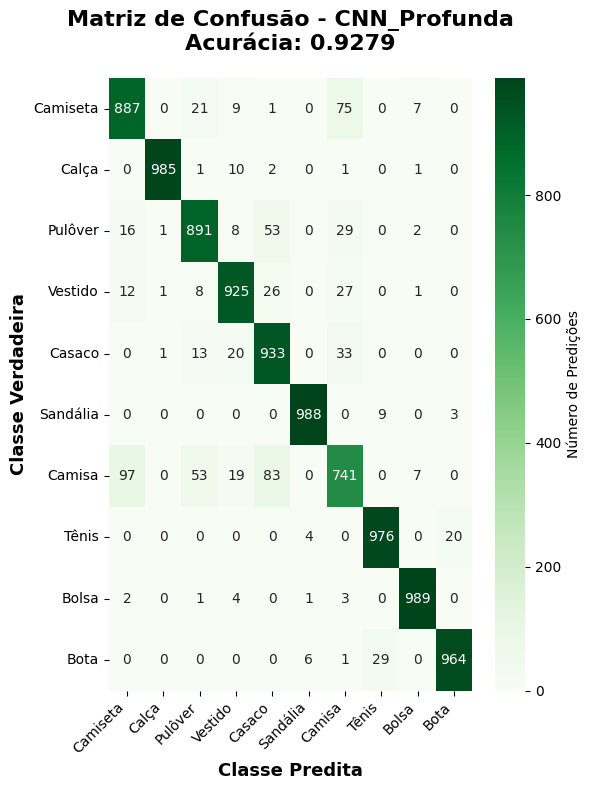


 Relatório de Classificação Detalhado - CNN_Profunda:
              precision    recall  f1-score   support

    Camiseta     0.8748    0.8870    0.8808      1000
       Calça     0.9970    0.9850    0.9909      1000
     Pulôver     0.9018    0.8910    0.8964      1000
     Vestido     0.9296    0.9250    0.9273      1000
      Casaco     0.8497    0.9330    0.8894      1000
    Sandália     0.9890    0.9880    0.9885      1000
      Camisa     0.8143    0.7410    0.7759      1000
       Tênis     0.9625    0.9760    0.9692      1000
       Bolsa     0.9821    0.9890    0.9856      1000
        Bota     0.9767    0.9640    0.9703      1000

    accuracy                         0.9279     10000
   macro avg     0.9278    0.9279    0.9274     10000
weighted avg     0.9278    0.9279    0.9274     10000


 Acurácia por Classe - CNN_Profunda:
------------------------------------------------------------
Camiseta        Acurácia: 0.8870 (887/1000 corretos)
Calça           Acurácia: 0.9850 (

In [20]:
# O segundo melhor modelo, de acordo com a acurácia, também é analisado para fins de comparação detalhada.
segundo_modelo = top_2_nomes[1]
res_segundo = resultados[segundo_modelo]

# A matriz de confusão é calculada para examinar os erros e acertos do segundo modelo por classe.
cm_segundo = confusion_matrix(y_test, res_segundo['y_pred'])

# A matriz de confusão do segundo modelo é exibida utilizando um mapa de calor.
plt.figure(figsize=(6, 8))
sns.heatmap(cm_segundo, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Número de Predições'})
plt.title(f'Matriz de Confusão - {segundo_modelo}\nAcurácia: {res_segundo["test_acc"]:.4f}',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Classe Verdadeira', fontsize=13, fontweight='bold')
plt.xlabel('Classe Predita', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# O relatório de classificação do segundo modelo é exibido, detalhando métricas por classe.
print(f"\n Relatório de Classificação Detalhado - {segundo_modelo}:")
print("="*80)
print(classification_report(y_test, res_segundo['y_pred'],
                          target_names=class_names, digits=4))

# A acurácia por classe é apresentada para o segundo modelo, incluindo o total de exemplos corretamente classificados.
print(f"\n Acurácia por Classe - {segundo_modelo}:")
print("-"*60)
for i, classe in enumerate(class_names):
    mask = (y_test == i).flatten()
    acc_classe = accuracy_score(y_test[mask], res_segundo['y_pred'][mask])
    total = mask.sum()
    corretos = (res_segundo['y_pred'][mask] == y_test[mask].flatten()).sum()
    print(f"{classe:<15} Acurácia: {acc_classe:.4f} ({corretos}/{total} corretos)")


**9.5) Comparação Lado a Lado das Matrizes de Confusão (Top 2)**

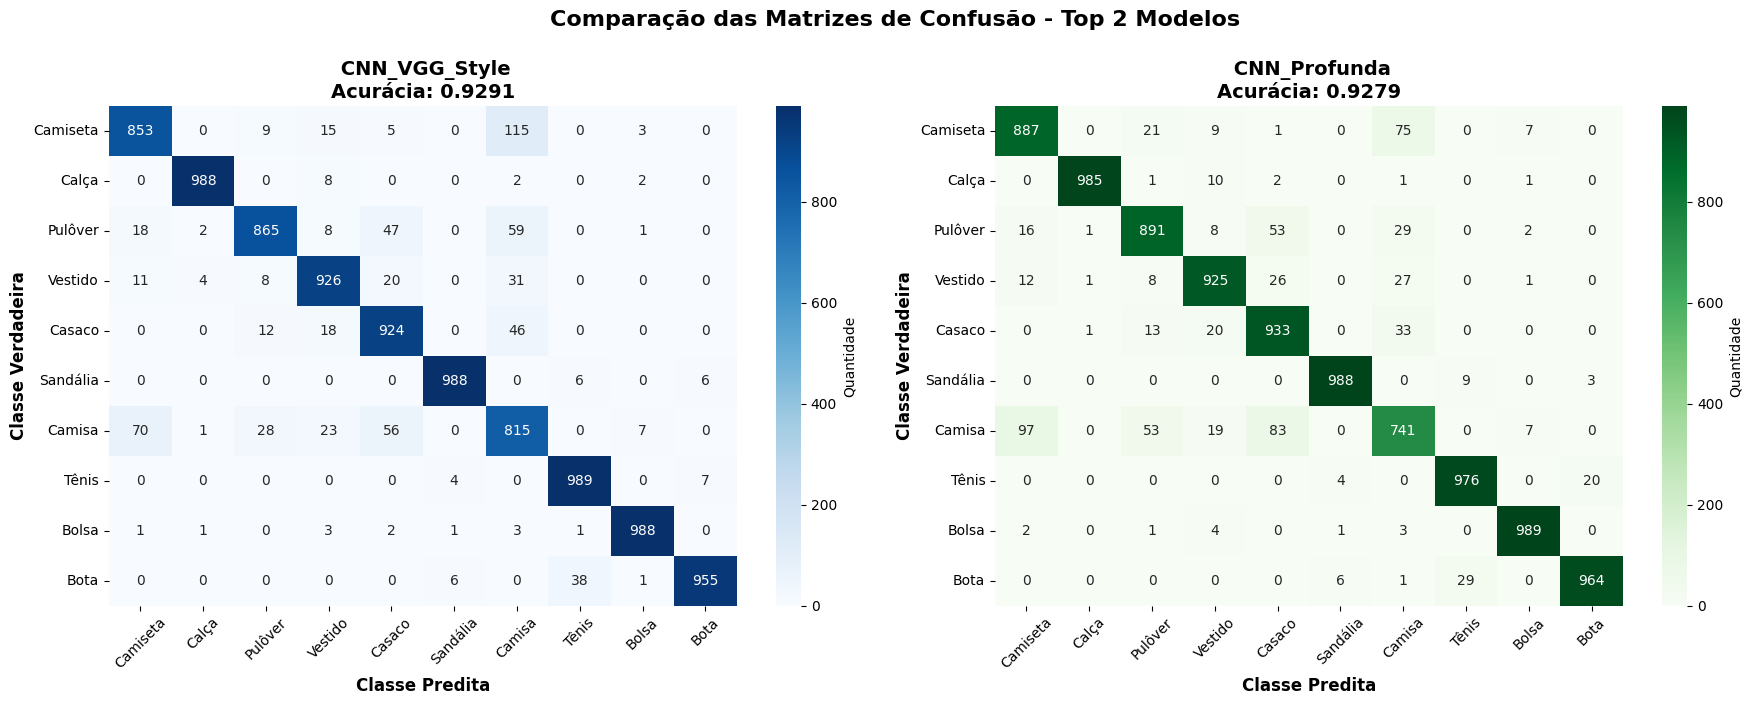

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Matriz do melhor modelo
sns.heatmap(cm_melhor, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            ax=axes[0], cbar_kws={'label': 'Quantidade'})
axes[0].set_title(f' {melhor_modelo}\nAcurácia: {res_melhor["test_acc"]:.4f}',
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Classe Verdadeira', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Classe Predita', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Matriz do segundo modelo
sns.heatmap(cm_segundo, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            ax=axes[1], cbar_kws={'label': 'Quantidade'})
axes[1].set_title(f' {segundo_modelo}\nAcurácia: {res_segundo["test_acc"]:.4f}',
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Classe Verdadeira', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Classe Predita', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Comparação das Matrizes de Confusão - Top 2 Modelos',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


 **9.6)Análise Comparativa Detalhada entre Top 2**

In [22]:
# Comparação geral de métricas
print(f"\n Comparação de Métricas Principais:")
print("-"*85)
print(f"{'Métrica':<25} {melhor_modelo:<25} {segundo_modelo:<25} {'Diferença'}")
print("-"*85)
print(f"{'Acurácia':<25} {res_melhor['test_acc']:<25.4f} {res_segundo['test_acc']:<25.4f} {res_melhor['test_acc']-res_segundo['test_acc']:+.4f}")
print(f"{'Loss':<25} {res_melhor['test_loss']:<25.4f} {res_segundo['test_loss']:<25.4f} {res_melhor['test_loss']-res_segundo['test_loss']:+.4f}")
print(f"{'Parâmetros':<25} {res_melhor['num_params']:<25,} {res_segundo['num_params']:<25,} {res_melhor['num_params']-res_segundo['num_params']:+,}")

# Eficiência: Acurácia por milhão de parâmetros
efic_melhor = (res_melhor['test_acc'] / res_melhor['num_params']) * 1e6
efic_segundo = (res_segundo['test_acc'] / res_segundo['num_params']) * 1e6
print(f"{'Eficiência (Acc/1M params)':<25} {efic_melhor:<25.2f} {efic_segundo:<25.2f} {efic_melhor-efic_segundo:+.2f}")

# Comparação classe por classe
print(f"\n Comparação de Acurácia por Classe:")
print("-"*90)
print(f"{'Classe':<15} {melhor_modelo:<25} {segundo_modelo:<25} {'Diferença':<15} {'Melhor'}")
print("-"*90)

for i, classe in enumerate(class_names):
    mask = (y_test == i).flatten()

    acc1 = accuracy_score(y_test[mask], res_melhor['y_pred'][mask])
    acc2 = accuracy_score(y_test[mask], res_segundo['y_pred'][mask])
    diff = acc1 - acc2

    melhor_nesta_classe = melhor_modelo if acc1 > acc2 else segundo_modelo if acc2 > acc1 else "Empate"
    emoji = "🟢" if abs(diff) > 0.02 else "🟡" if abs(diff) > 0.01 else "⚪"

    print(f"{classe:<15} {acc1:<25.4f} {acc2:<25.4f} {diff:+.4f}          {emoji} {melhor_nesta_classe}")

# Identifica em quantas classes cada modelo é melhor
vitorias_melhor = sum(1 for i in range(len(class_names))
                      if accuracy_score(y_test[y_test == i],
                                      res_melhor['y_pred'][y_test.flatten() == i]) >
                         accuracy_score(y_test[y_test == i],
                                      res_segundo['y_pred'][y_test.flatten() == i]))

vitorias_segundo = sum(1 for i in range(len(class_names))
                       if accuracy_score(y_test[y_test == i],
                                       res_segundo['y_pred'][y_test.flatten() == i]) >
                          accuracy_score(y_test[y_test == i],
                                       res_melhor['y_pred'][y_test.flatten() == i]))

empates = len(class_names) - vitorias_melhor - vitorias_segundo

print(f"\n Resultado por Classes:")
print(f"   {melhor_modelo}: {vitorias_melhor} classes com melhor acurácia")
print(f"   {segundo_modelo}: {vitorias_segundo} classes com melhor acurácia")
print(f"   Empates: {empates} classes")



 Comparação de Métricas Principais:
-------------------------------------------------------------------------------------
Métrica                   CNN_VGG_Style             CNN_Profunda              Diferença
-------------------------------------------------------------------------------------
Acurácia                  0.9291                    0.9279                    +0.0012
Loss                      0.2116                    0.2049                    +0.0067
Parâmetros                2,329,546                 1,676,266                 +653,280
Eficiência (Acc/1M params) 0.40                      0.55                      -0.15

 Comparação de Acurácia por Classe:
------------------------------------------------------------------------------------------
Classe          CNN_VGG_Style             CNN_Profunda              Diferença       Melhor
------------------------------------------------------------------------------------------
Camiseta        0.8530                    0.8870 

**9.7)Análise de Predições Divergentes entre Top 2**


 Total de predições divergentes: 539 de 10000
   Percentual: 5.39%

 Nas predições divergentes:
   CNN_VGG_Style acertou: 246 (45.64%)
   CNN_Profunda acertou: 234 (43.41%)
   Ambos erraram: 59


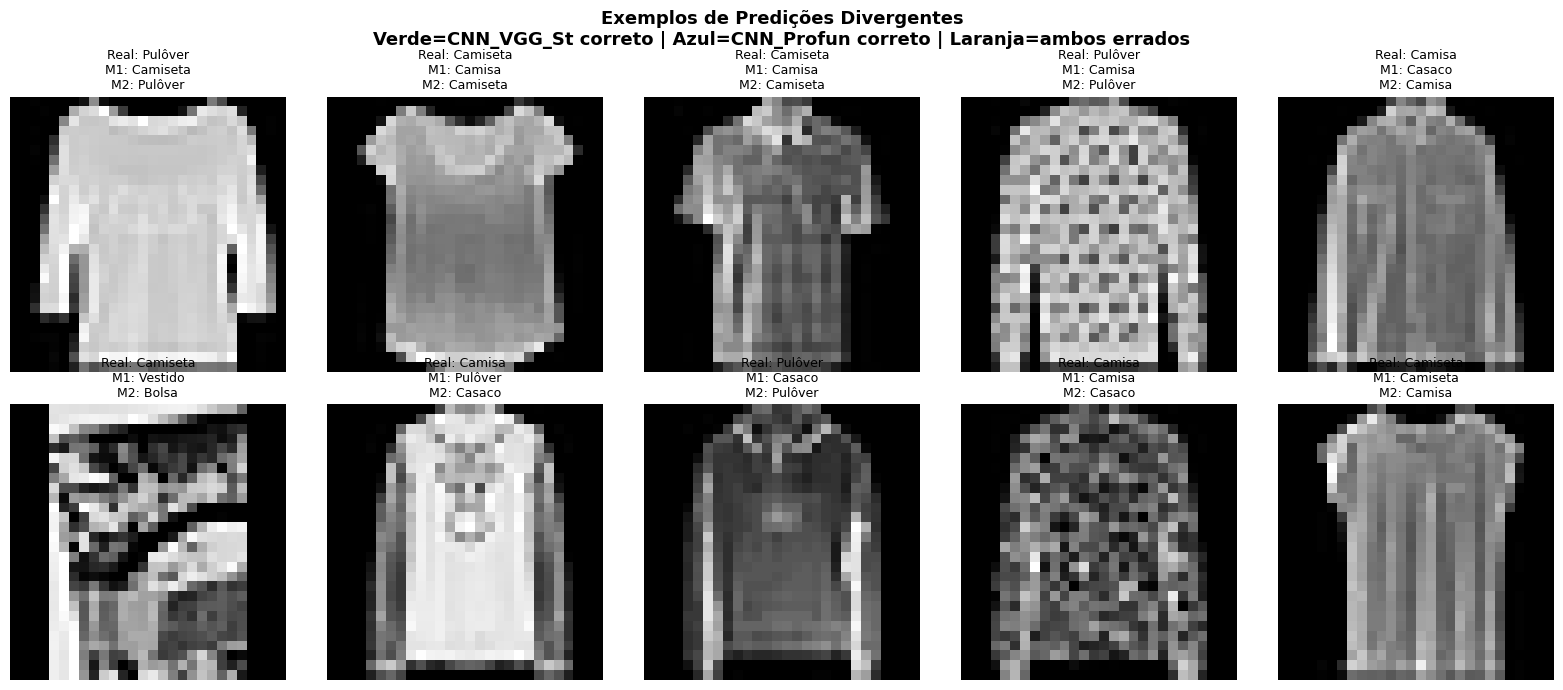

In [25]:
# São identificadas as amostras em que as previsões dos dois melhores modelos divergem.
divergencias = (res_melhor['y_pred'] != res_segundo['y_pred']).flatten()
indices_divergentes = np.where(divergencias)[0]

print(f"\n Total de predições divergentes: {len(indices_divergentes)} de {len(y_test)}")
print(f"   Percentual: {len(indices_divergentes)/len(y_test)*100:.2f}%")

# Para as amostras divergentes, contabiliza-se quantas são acertadas por cada modelo.
acertos_melhor_nas_div = sum(res_melhor['y_pred'][indices_divergentes] == y_test[indices_divergentes].flatten())
acertos_segundo_nas_div = sum(res_segundo['y_pred'][indices_divergentes] == y_test[indices_divergentes].flatten())

print(f"\n Nas predições divergentes:")
print(f"   {melhor_modelo} acertou: {acertos_melhor_nas_div} ({acertos_melhor_nas_div/len(indices_divergentes)*100:.2f}%)")
print(f"   {segundo_modelo} acertou: {acertos_segundo_nas_div} ({acertos_segundo_nas_div/len(indices_divergentes)*100:.2f}%)")
print(f"   Ambos erraram: {len(indices_divergentes) - acertos_melhor_nas_div - acertos_segundo_nas_div}")

# Exemplos de predições divergentes são visualizados para análise qualitativa dos erros individuais dos modelos.
if len(indices_divergentes) > 0:

    fig, axes = plt.subplots(2, 5, figsize=(16, 7))
    axes = axes.flatten()

    # Até 10 exemplos divergentes são selecionados aleatoriamente.
    exemplos = np.random.choice(indices_divergentes,
                                min(10, len(indices_divergentes)),
                                replace=False)

    for i, idx in enumerate(exemplos):
        axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')

        real = class_names[y_test[idx]]
        pred1 = class_names[res_melhor['y_pred'][idx]]
        pred2 = class_names[res_segundo['y_pred'][idx]]

        # A cor da borda indica qual modelo acertou, e o título exibe os rótulos reais e previstos.
        cor1 = 'green' if res_melhor['y_pred'][idx] == y_test[idx] else 'red'
        cor2 = 'green' if res_segundo['y_pred'][idx] == y_test[idx] else 'red'

        titulo = f"Real: {real}\n"
        titulo += f"M1: {pred1}\n"
        titulo += f"M2: {pred2}"

        axes[i].set_title(titulo, fontsize=9)
        axes[i].axis('off')

        # Borda verde indica acerto do primeiro modelo, azul do segundo e laranja caso ambos errem.
        for spine in axes[i].spines.values():
            if cor1 == 'green' and cor2 == 'red':
                spine.set_edgecolor('green')
                spine.set_linewidth(3)
            elif cor2 == 'green' and cor1 == 'red':
                spine.set_edgecolor('blue')
                spine.set_linewidth(3)
            else:
                spine.set_edgecolor('orange')
                spine.set_linewidth(2)

    plt.suptitle(f'Exemplos de Predições Divergentes\nVerde={melhor_modelo[:10]} correto | Azul={segundo_modelo[:10]} correto | Laranja=ambos errados',
                 fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

#10) Definição da Rede MLP para Comparação

    REDE MLP (MULTI-LAYER PERCEPTRON)

    Características:
    - SEM camadas convolucionais
    - Apenas camadas densas (fully connected)
    - Flatten direto dos pixels de entrada
    - 3 camadas ocultas: 512, 256, 128 neurônios
    - Dropout para regularização

    Objetivo: Comparar o desempenho com as CNNs para demonstrar
             a vantagem das convoluções para dados de imagem

In [26]:
def criar_mlp(input_shape=(28, 28, 1)):

    model = models.Sequential([
        # Achata a imagem (28x28x1 -> 784)
        layers.Flatten(input_shape=input_shape),

        # Primeira camada densa
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),

        # Segunda camada densa
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        # Terceira camada densa
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),

        # Camada de saída
        layers.Dense(10, activation='softmax')
    ], name='MLP')

    return model

# Cria o modelo MLP
mlp_model = criar_mlp()

print("\n Arquitetura da MLP:")
mlp_model.summary()

# Compila o modelo
mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


 Arquitetura da MLP:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

#11) Treinamento da Rede MLP

In [27]:
# Os principais parâmetros de treinamento do modelo MLP são exibidos para referência.
print(f"\n Parâmetros de treinamento:")
print(f"   Batch size: 128")
print(f"   Épocas máximas: 50")
print(f"   Validação: 20% dos dados de treino")
print(f"   Callbacks: Early Stopping e Reduce LR")

# Exibe o número total de parâmetros treináveis da MLP.
print(f"\n Total de parâmetros da MLP: {mlp_model.count_params():,}")

# O modelo MLP é treinado utilizando os mesmos parâmetros e callbacks adotados para as arquiteturas CNN.
mlp_history = mlp_model.fit(
    X_train_cnn, y_train_cat,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# O desempenho final é avaliado no conjunto de teste.
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test_cnn, y_test_cat, verbose=0)

# São geradas as predições da MLP sobre o conjunto de teste, convertendo probabilidades em rótulos.
mlp_y_pred = mlp_model.predict(X_test_cnn, verbose=0)
mlp_y_pred_classes = np.argmax(mlp_y_pred, axis=1)

mlp_params = mlp_model.count_params()
print(f"   Acurácia no Teste: {mlp_test_acc:.4f} ({mlp_test_acc*100:.2f}%)")
print(f"   Loss no Teste: {mlp_test_loss:.4f}")
print(f"   Total de Parâmetros: {mlp_params:,}")


 Parâmetros de treinamento:
   Batch size: 128
   Épocas máximas: 50
   Validação: 20% dos dados de treino
   Callbacks: Early Stopping e Reduce LR

 Total de parâmetros da MLP: 567,434
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5523 - loss: 1.2232 - val_accuracy: 0.8168 - val_loss: 0.4860 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7950 - loss: 0.5777 - val_accuracy: 0.8488 - val_loss: 0.4148 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8229 - loss: 0.5051 - val_accuracy: 0.8554 - val_loss: 0.3930 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8382 - loss: 0.4660 - val_accuracy: 0.8528 - val_loss: 0.3997 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8405 - loss: 0.4455 - val_accuracy: 0.8606 - val_loss: 0.3824 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step -

#12) Comparação Detalhada CNN vs MLP

In [28]:
# Uma tabela comparativa exibe as principais métricas entre o melhor modelo CNN e a MLP tradicional.
print("-"*95)
print(f"{'Modelo':<20} {'Acurácia':<15} {'Loss':<15} {'Parâmetros':<20} {'Acc/1M params'}")
print("-"*95)
print(f"{melhor_modelo:<20} {res_melhor['test_acc']:<15.4f} {res_melhor['test_loss']:<15.4f} {res_melhor['num_params']:>19,} {efic_melhor:>14.2f}")
print(f"{'MLP':<20} {mlp_test_acc:<15.4f} {mlp_test_loss:<15.4f} {mlp_params:>19,} {(mlp_test_acc/mlp_params)*1e6:>14.2f}")
print("-"*95)
print(f"{'Diferença':<20} {res_melhor['test_acc']-mlp_test_acc:+.4f}            {res_melhor['test_loss']-mlp_test_loss:+.4f}            {res_melhor['num_params']-mlp_params:+,}")

# Uma análise compara a acurácia e a eficiência paramétrica entre CNN e MLP.
vantagem_acc = ((res_melhor['test_acc'] - mlp_test_acc) / mlp_test_acc) * 100
print(f"\n Análise:")
print(f"   A melhor CNN ({melhor_modelo}) é {abs(vantagem_acc):.2f}% {'melhor' if vantagem_acc > 0 else 'pior'} que a MLP")
print(f"   A CNN tem {abs(res_melhor['num_params']-mlp_params):,} {'a mais' if res_melhor['num_params'] > mlp_params else 'a menos'} de parâmetros")

# A conclusão relaciona desempenho e eficiência paramétrica das arquiteturas analisadas.
if res_melhor['num_params'] < mlp_params and res_melhor['test_acc'] > mlp_test_acc:
    print(f"    A CNN é MAIS EFICIENTE: melhor acurácia com MENOS parâmetros!")
elif res_melhor['test_acc'] > mlp_test_acc:
    print(f"    A CNN é MAIS PRECISA, porém com mais parâmetros")
else:
    print(f"    Neste caso, a MLP teve desempenho competitivo")

-----------------------------------------------------------------------------------------------
Modelo               Acurácia        Loss            Parâmetros           Acc/1M params
-----------------------------------------------------------------------------------------------
CNN_VGG_Style        0.9291          0.2116                    2,329,546           0.40
MLP                  0.8898          0.3276                      567,434           1.57
-----------------------------------------------------------------------------------------------
Diferença            +0.0393            -0.1160            +1,762,112

 Análise:
   A melhor CNN (CNN_VGG_Style) é 4.42% melhor que a MLP
   A CNN tem 1,762,112 a mais de parâmetros
    A CNN é MAIS PRECISA, porém com mais parâmetros


**12.1) Gráficos Comparativos CNN vs MLP**

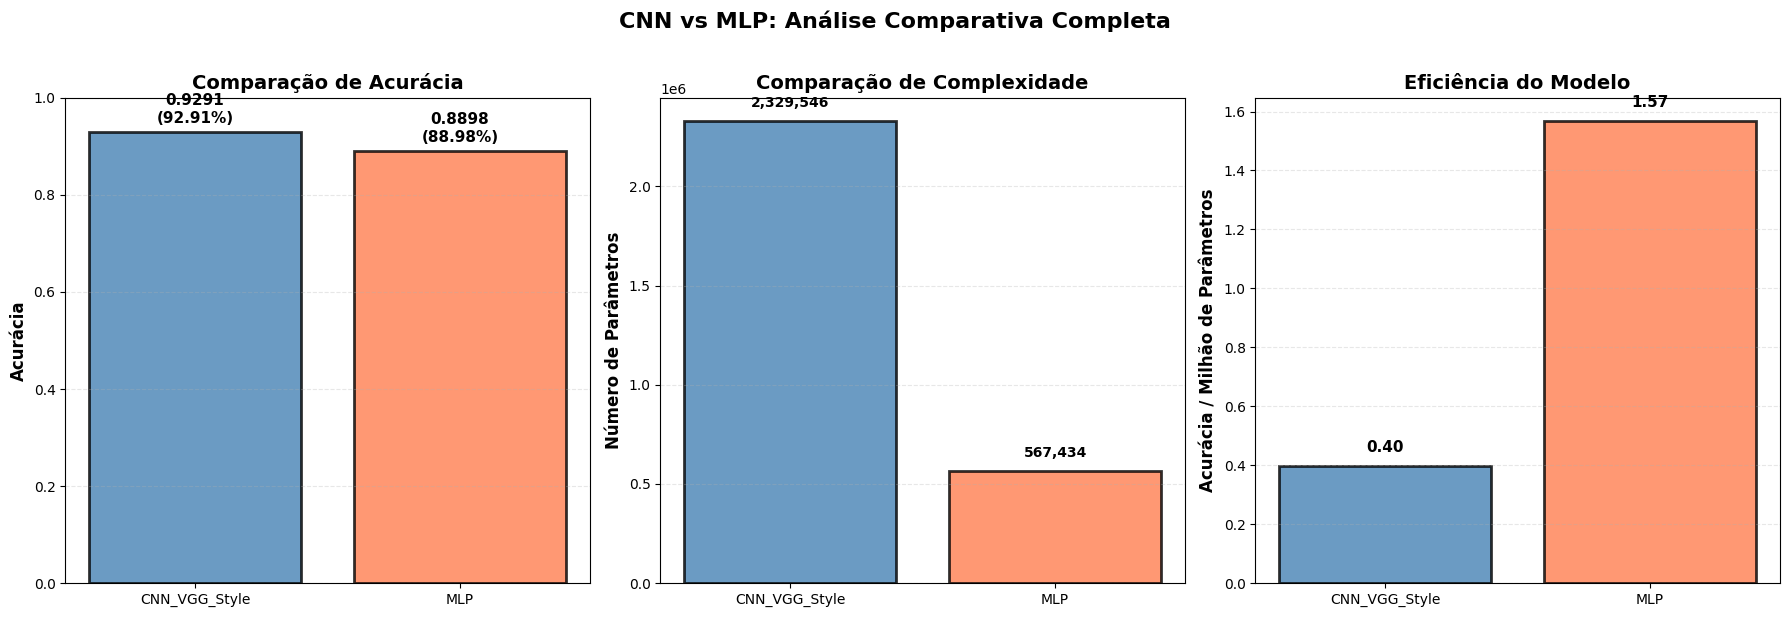

In [29]:
# Três gráficos são gerados para comparar desempenho, complexidade e eficiência entre a melhor CNN e a MLP.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

modelos_comp = [melhor_modelo, 'MLP']
acuracias_comp = [res_melhor['test_acc'], mlp_test_acc]
params_comp = [res_melhor['num_params'], mlp_params]
eficiencias = [(acuracias_comp[i] / params_comp[i]) * 1e6 for i in range(2)]

cores = ['steelblue', 'coral']

# O primeiro gráfico apresenta a acurácia de teste para cada modelo comparado.
axes[0].bar(modelos_comp, acuracias_comp, color=cores, alpha=0.8, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Acurácia', fontsize=12, fontweight='bold')
axes[0].set_title('Comparação de Acurácia', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(acuracias_comp):
    axes[0].text(i, v + 0.02, f'{v:.4f}\n({v*100:.2f}%)',
                ha='center', fontweight='bold', fontsize=11)

# O segundo gráfico compara o número de parâmetros treináveis de cada arquitetura.
axes[1].bar(modelos_comp, params_comp, color=cores, alpha=0.8, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Número de Parâmetros', fontsize=12, fontweight='bold')
axes[1].set_title('Comparação de Complexidade', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(params_comp):
    axes[1].text(i, v + max(params_comp)*0.03, f'{v:,}',
                ha='center', fontweight='bold', fontsize=10)

# O terceiro gráfico demonstra a eficiência paramétrica (acurácia por milhão de parâmetros).
axes[2].bar(modelos_comp, eficiencias, color=cores, alpha=0.8, edgecolor='black', linewidth=2)
axes[2].set_ylabel('Acurácia / Milhão de Parâmetros', fontsize=12, fontweight='bold')
axes[2].set_title('Eficiência do Modelo', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(eficiencias):
    axes[2].text(i, v + max(eficiencias)*0.03, f'{v:.2f}',
                ha='center', fontweight='bold', fontsize=11)

plt.suptitle('CNN vs MLP: Análise Comparativa Completa',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

**12.2)Curvas de Aprendizado CNN vs MLP**

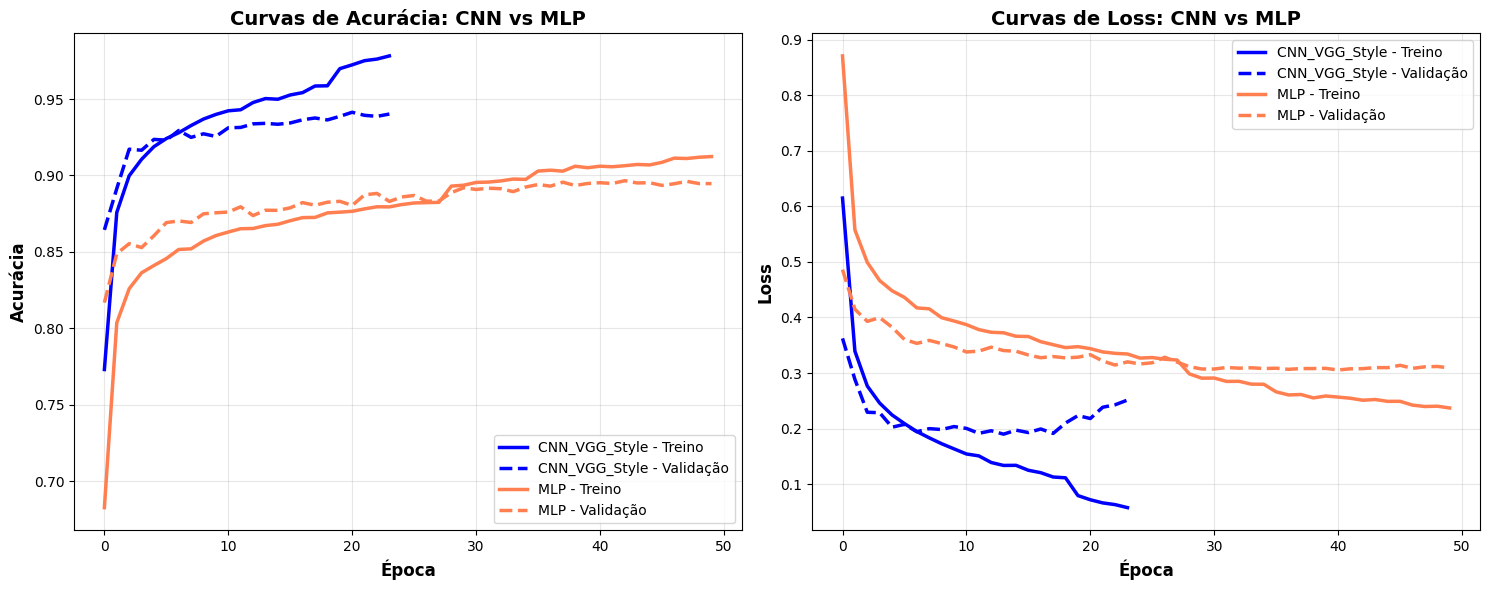

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Acurácia
axes[0].plot(res_melhor['history'].history['accuracy'],
            label=f'{melhor_modelo} - Treino', linewidth=2.5, color='blue')
axes[0].plot(res_melhor['history'].history['val_accuracy'],
            label=f'{melhor_modelo} - Validação', linewidth=2.5, color='blue', linestyle='--')
axes[0].plot(mlp_history.history['accuracy'],
            label='MLP - Treino', linewidth=2.5, color='coral')
axes[0].plot(mlp_history.history['val_accuracy'],
            label='MLP - Validação', linewidth=2.5, color='coral', linestyle='--')

axes[0].set_xlabel('Época', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Acurácia', fontsize=12, fontweight='bold')
axes[0].set_title('Curvas de Acurácia: CNN vs MLP', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Loss
axes[1].plot(res_melhor['history'].history['loss'],
            label=f'{melhor_modelo} - Treino', linewidth=2.5, color='blue')
axes[1].plot(res_melhor['history'].history['val_loss'],
            label=f'{melhor_modelo} - Validação', linewidth=2.5, color='blue', linestyle='--')
axes[1].plot(mlp_history.history['loss'],
            label='MLP - Treino', linewidth=2.5, color='coral')
axes[1].plot(mlp_history.history['val_loss'],
            label='MLP - Validação', linewidth=2.5, color='coral', linestyle='--')

axes[1].set_xlabel('Época', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[1].set_title('Curvas de Loss: CNN vs MLP', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**12.3)Comparação de Acurácia por Classe (CNN vs MLP)**


 Acurácia por Classe:
---------------------------------------------------------------------------
Classe          CNN                  MLP                  Diferença       Melhor
---------------------------------------------------------------------------
Camiseta        0.8530               0.8380               +0.0150          🔵 CNN
Calça           0.9880               0.9740               +0.0140          🔵 CNN
Pulôver         0.8650               0.8270               +0.0380          🔵 CNN
Vestido         0.9260               0.9140               +0.0120          🔵 CNN
Casaco          0.9240               0.7960               +0.1280          🔵 CNN
Sandália        0.9880               0.9670               +0.0210          🔵 CNN
Camisa          0.8150               0.6710               +0.1440          🔵 CNN
Tênis           0.9890               0.9710               +0.0180          🔵 CNN
Bolsa           0.9880               0.9780               +0.0100          🔵 CNN
Bota           

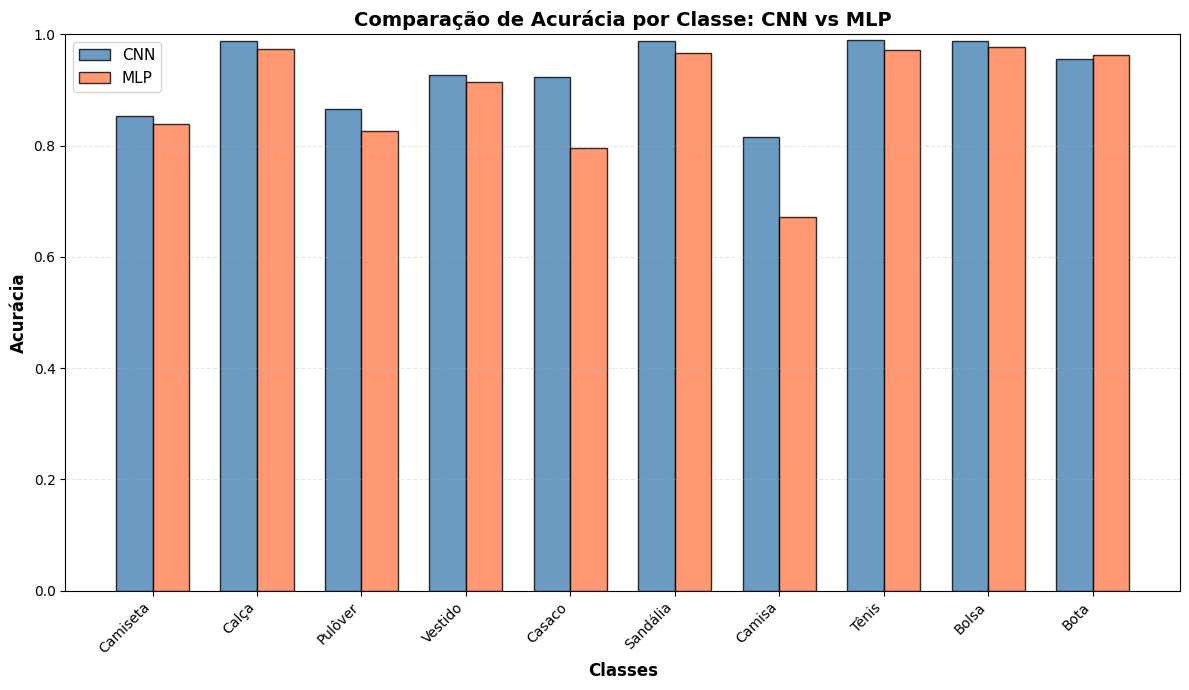

In [31]:
print(f"\n Acurácia por Classe:")
print("-"*75)
print(f"{'Classe':<15} {'CNN':<20} {'MLP':<20} {'Diferença':<15} {'Melhor'}")
print("-"*75)

vitorias_cnn = 0
vitorias_mlp = 0

for i, classe in enumerate(class_names):
    mask = (y_test == i).flatten()

    acc_cnn = accuracy_score(y_test[mask], res_melhor['y_pred'][mask])
    acc_mlp = accuracy_score(y_test[mask], mlp_y_pred_classes[mask])
    diff = acc_cnn - acc_mlp

    if diff > 0.01:
        melhor = "CNN"
        vitorias_cnn += 1
        emoji = "🔵"
    elif diff < -0.01:
        melhor = "MLP"
        vitorias_mlp += 1
        emoji = "🟠"
    else:
        melhor = "Empate"
        emoji = "⚪"

    print(f"{classe:<15} {acc_cnn:<20.4f} {acc_mlp:<20.4f} {diff:+.4f}          {emoji} {melhor}")

print(f"   CNN melhor em: {vitorias_cnn} classes")
print(f"   MLP melhor em: {vitorias_mlp} classes")
print(f"   Empates: {10 - vitorias_cnn - vitorias_mlp} classes")

# Visualização gráfica
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(class_names))
width = 0.35

bars1 = ax.bar(x - width/2, [accuracy_score(y_test[y_test == i], res_melhor['y_pred'][y_test.flatten() == i])
                              for i in range(10)],
              width, label='CNN', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, [accuracy_score(y_test[y_test == i], mlp_y_pred_classes[y_test.flatten() == i])
                              for i in range(10)],
              width, label='MLP', color='coral', alpha=0.8, edgecolor='black')

ax.set_ylabel('Acurácia', fontsize=12, fontweight='bold')
ax.set_xlabel('Classes', fontsize=12, fontweight='bold')
ax.set_title('Comparação de Acurácia por Classe: CNN vs MLP', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

#13) Conclusões

### Comparação CNN vs MLP

| Modelo | Tipo | Acurácia | Parâmetros | Eficiência |
|--------|------|----------|------------|------------|
| **CNN_VGG_Style** | CNN | **92.91%** | 2,329,546 | 0.40 |
| **MLP** | MLP | **88.98%** | 567,434 | 1.57 |
| **Vantagem CNN** | - | **+3.93%** | +1,762,112 | - |

## Principais Conclusões

### 1. Superioridade das CNNs para Dados de Imagem
- As CNNs demonstraram **clara vantagem** sobre MLPs para classificação de imagens
- A melhor CNN (VGG Style) superou a MLP em **3.93 pontos percentuais**
- CNNs aproveitam a **estrutura espacial** das imagens através de camadas convolucionais
- Filtros convolucionais extraem características hierárquicas automaticamente

### 2. Eficiência e Complexidade
- Apesar de ter **4x mais parâmetros** que a MLP, a CNN VGG Style alcançou desempenho significativamente superior
- A CNN mais simples (121,930 parâmetros) ainda superou a MLP (567,434 parâmetros)
- **Compartilhamento de pesos** nos filtros convolucionais torna CNNs mais eficientes
- CNNs menores podem ser mais eficientes em termos de acurácia/parâmetro

### 3. Importância da Arquitetura
- Variação de até **2.46%** entre diferentes topologias CNN
- Arquiteturas inspiradas em modelos consolidados (VGG) mostraram melhor desempenho
- **Profundidade** importa: modelos mais profundos capturam características mais complexas
- Filtros 3x3 empilhados (estilo VGG) são mais eficazes que filtros grandes isolados

### 4. Técnicas de Regularização
- **Dropout progressivo** (0.2 → 0.5) foi fundamental para evitar overfitting
- **Batch Normalization** melhorou convergência e estabilidade do treinamento
- **Early Stopping** preveniu treinamento excessivo
- **MaxPooling** reduziu dimensionalidade mantendo características importantes

##  Análise Comparativa Top 2 (VGG vs Profunda)

### Métricas Comparativas
| Métrica | CNN_VGG_Style | CNN_Profunda | Diferença |
|---------|---------------|--------------|-----------|
| Acurácia | 92.91% | 92.79% | +0.12% |
| Loss | 0.2116 | 0.2049 | +0.0067 |
| Parâmetros | 2,329,546 | 1,676,266 | +653,280 |

### Análise de Divergências
- **539 predições divergentes** entre os dois modelos (5.39% do total)
- Nas divergências:
  - VGG Style acertou: **246 casos (45.64%)**
  - CNN Profunda acertou: **234 casos (43.41%)**
  - Ambos erraram: **59 casos (10.95%)**
- VGG Style foi melhor em **4 classes**
- CNN Profunda foi melhor em **5 classes**


### Arquitetura
- Múltiplas camadas convolucionais 3x3 consecutivas (estilo VGG) são altamente eficazes  
- Aumentar gradualmente o número de filtros (64 → 128 → 256) captura hierarquia de características  
- Arquiteturas mais profundas superam arquiteturas mais largas  

### Treinamento
- Batch Normalization acelera convergência e permite learning rates maiores  
- Dropout progressivo equilibra capacidade de aprendizado e generalização  
- Early Stopping com patience adequado (10 épocas) evita desperdício de recursos  
- Reduce Learning Rate on Plateau melhora ajuste fino do modelo  

### Comparação CNN vs MLP
- CNNs são **superiores para dados visuais** devido à invariância translacional  
- Camadas convolucionais extraem características automaticamente, eliminando feature engineering manual  
- MLPs tratam pixels como features independentes, perdendo informação espacial  
- CNNs generalizam melhor para padrões visuais não vistos no treinamento  

##  Por Que CNNs São Melhores para Imagens?

1. **Compartilhamento de Pesos**: Mesmo filtro aplicado em toda a imagem
2. **Invariância Local**: Detectam padrões independente da posição
3. **Hierarquia de Características**: Camadas iniciais detectam bordas, camadas finais detectam objetos
4. **Redução de Parâmetros**: Conexões locais vs fully-connected
5. **Pooling Spatial**: Mantém características importantes enquanto reduz dimensão

##  Resultado Final

### Fashion MNIST - Comparação Geral

**Melhor CNN**: 92.91% (CNN_VGG_Style)  
**MLP**: 88.98%  
**Melhoria**: +3.93 pontos percentuais (+4.42% relativo)

> **A CNN VGG Style demonstrou ser a arquitetura mais eficaz para o Fashion MNIST, superando significativamente a MLP tradicional e confirmando a hipótese de que redes convolucionais são superiores para tarefas de classificação de imagens.**


#14) Bibliografia

1. **Stanford CS231n.** "Convolutional Neural Networks for Visual Recognition." Disponível em: http://cs231n.stanford.edu/
    - Curso referência sobre CNNs

2. **Keras Blog.** "Building powerful image classification models using very little data." Disponível em: https://blog.keras.io/
    - Boas práticas de implementação
